# 重庆二手房数据分析

数据来源：链家二手房

包含区域：沙坪坝区，九龙坡区，渝北区，渝中区

数据日期：20220908

数据数量：每个区大约100页数据

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style({'font.sans-serif': ['SimHei','Arial']})

%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei", "Arial Unicode MS"] # 设置字体
# plt.rcParams["font.sans-serif"]=["SimHei"] # Win设置字体
plt.rcParams["axes.unicode_minus"]=False # 该语句解决图像中的 "-" 负号的乱码问题


In [256]:
# 导入数据
df = pd.read_csv("../.datasets/cq-ershoufang-20220908.csv")
df = df.drop("title", axis=1)
df = df.drop("tag", axis=1)
df = df.drop("follow", axis=1)
df.head(5)

,community,position,layout,area,towards,furnish,floor,year,build_type,unit_price,total_price
0,虎溪花园,大学城,4室2厅,157.98平米,南,精装,低楼层(共11层),未知,板楼,11584,183.0
1,金科廊桥天都,大学城,1室1厅,50.81平米,南,精装,24层,2012年建,板塔结合,9644,49.0
2,重庆融创万达文化旅游城长湖郡,西永,4室2厅,127.01平米,南北,毛坯,高楼层(共7层),未知,板楼,16298,207.0
3,龙湖西宸原著,大学城,4室2厅,136.5平米,南,精装,中楼层(共7层),未知,板楼,15385,210.0
4,富力城天禧,大学城,3室2厅,101.82平米,北,精装,高楼层(共33层),2018年建,塔楼,12081,123.0


In [257]:
# 数据类型
df.dtypes

community       object
position        object
layout          object
area            object
towards         object
furnish         object
floor           object
year            object
build_type      object
unit_price       int64
total_price    float64
dtype: object

In [258]:
# 空值排查
df.isnull().sum()

community      0
position       0
layout         0
area           0
towards        0
furnish        0
floor          0
year           0
build_type     0
unit_price     0
total_price    0
dtype: int64

In [259]:
# 数据清洗
df["area"] = df["area"].str.extract("(\d+\.\d+)平米")
df.head(5)

,community,position,layout,area,towards,furnish,floor,year,build_type,unit_price,total_price
0,虎溪花园,大学城,4室2厅,157.98,南,精装,低楼层(共11层),未知,板楼,11584,183.0
1,金科廊桥天都,大学城,1室1厅,50.81,南,精装,24层,2012年建,板塔结合,9644,49.0
2,重庆融创万达文化旅游城长湖郡,西永,4室2厅,127.01,南北,毛坯,高楼层(共7层),未知,板楼,16298,207.0
3,龙湖西宸原著,大学城,4室2厅,136.5,南,精装,中楼层(共7层),未知,板楼,15385,210.0
4,富力城天禧,大学城,3室2厅,101.82,北,精装,高楼层(共33层),2018年建,塔楼,12081,123.0


In [260]:
# 数据类型转换
df["area"] = df["area"].astype("float")

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   community    11970 non-null  object 
 1   position     11970 non-null  object 
 2   layout       11970 non-null  object 
 3   area         10281 non-null  float64
 4   towards      11970 non-null  object 
 5   furnish      11970 non-null  object 
 6   floor        11970 non-null  object 
 7   year         11970 non-null  object 
 8   build_type   11970 non-null  object 
 9   unit_price   11970 non-null  int64  
 10  total_price  11970 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.0+ MB


In [262]:
# 数据整体描述
df.describe()

,area,unit_price,total_price
count,10281.000000,11970.000000,11970.000000
mean,107.514944,14549.387552,164.359682
std,53.483700,4705.902252,132.312829
min,16.800000,3630.000000,12.500000
25%,78.780000,11370.000000,98.000000
50%,96.020000,13727.000000,130.000000
75%,125.270000,16719.500000,187.450000
max,1109.610000,58937.000000,2898.000000


In [263]:
# 筛选合适的数据
df = df[(df.total_price <= 500.0) & (df.area < 400.0)]
df.head()

,community,position,layout,area,towards,furnish,floor,year,build_type,unit_price,total_price
0,虎溪花园,大学城,4室2厅,157.98,南,精装,低楼层(共11层),未知,板楼,11584,183.0
1,金科廊桥天都,大学城,1室1厅,50.81,南,精装,24层,2012年建,板塔结合,9644,49.0
2,重庆融创万达文化旅游城长湖郡,西永,4室2厅,127.01,南北,毛坯,高楼层(共7层),未知,板楼,16298,207.0
3,龙湖西宸原著,大学城,4室2厅,136.50,南,精装,中楼层(共7层),未知,板楼,15385,210.0
4,富力城天禧,大学城,3室2厅,101.82,北,精装,高楼层(共33层),2018年建,塔楼,12081,123.0


In [264]:
# 位置分组数据
position_df = df.groupby('position')['community'].count().sort_values(ascending=False).to_frame().reset_index()
position_df.head(10)

,position,community
0,大学城,1252
1,大坪,982
2,西永,768
3,解放碑,568
4,化龙桥,493
5,华岩,488
6,照母山,416
7,蟠龙,412
8,石桥铺,309
9,回兴,231


In [265]:
# 户型分组数据
layout_df = df.groupby('layout')['community'].count().sort_values(ascending=False).to_frame().reset_index()
layout_df.head(10)

,layout,community
0,3室2厅,3008
1,3室1厅,1566
2,2室1厅,1529
3,4室2厅,1429
4,2室2厅,947
5,1室1厅,554
6,4室1厅,335
7,5室2厅,241
8,1室0厅,221
9,5室3厅,49


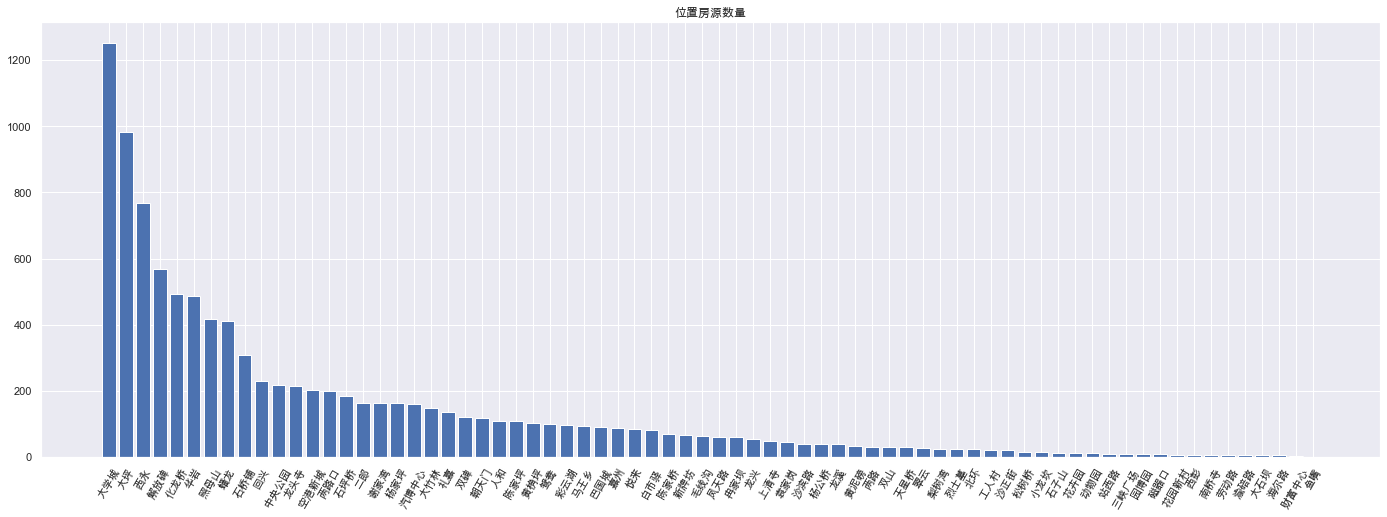

In [266]:
# 位置房源数量
position_number = df.groupby('position')['community'].count().sort_values(ascending=False).to_frame().reset_index()
plt.figure(figsize=(24,8))
plt.bar(position_number.position, position_number.community)
plt.title('位置房源数量')
# plt.xticks(position_number.index)
plt.xticks(rotation=60)
plt.show()

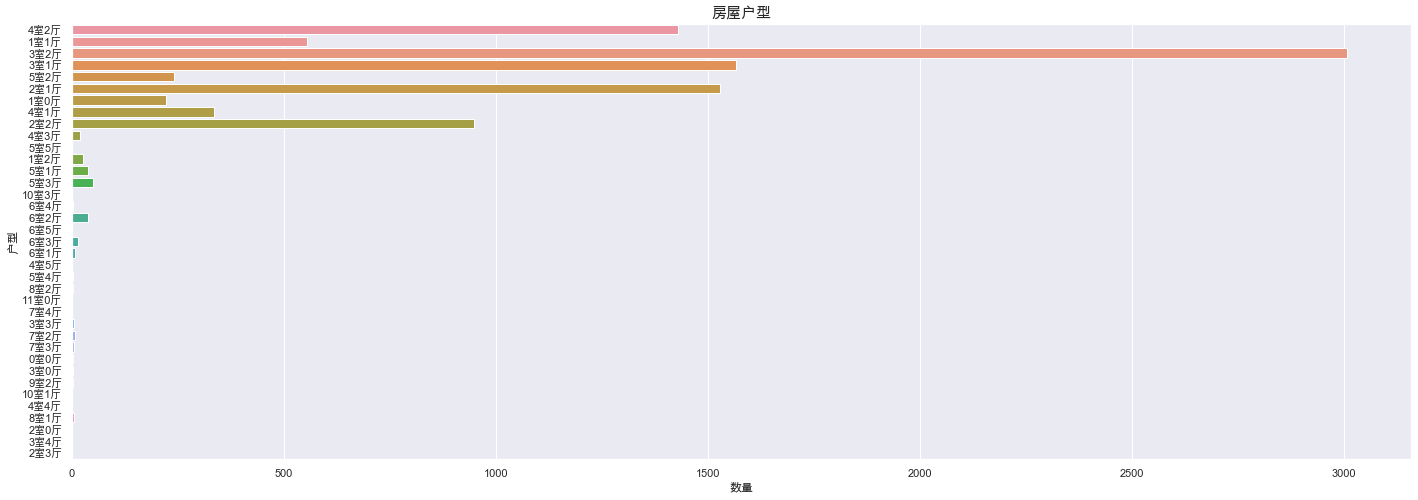

In [267]:
# 户型分析
f, ax1= plt.subplots(figsize=(24,8))
sns.countplot(y='layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

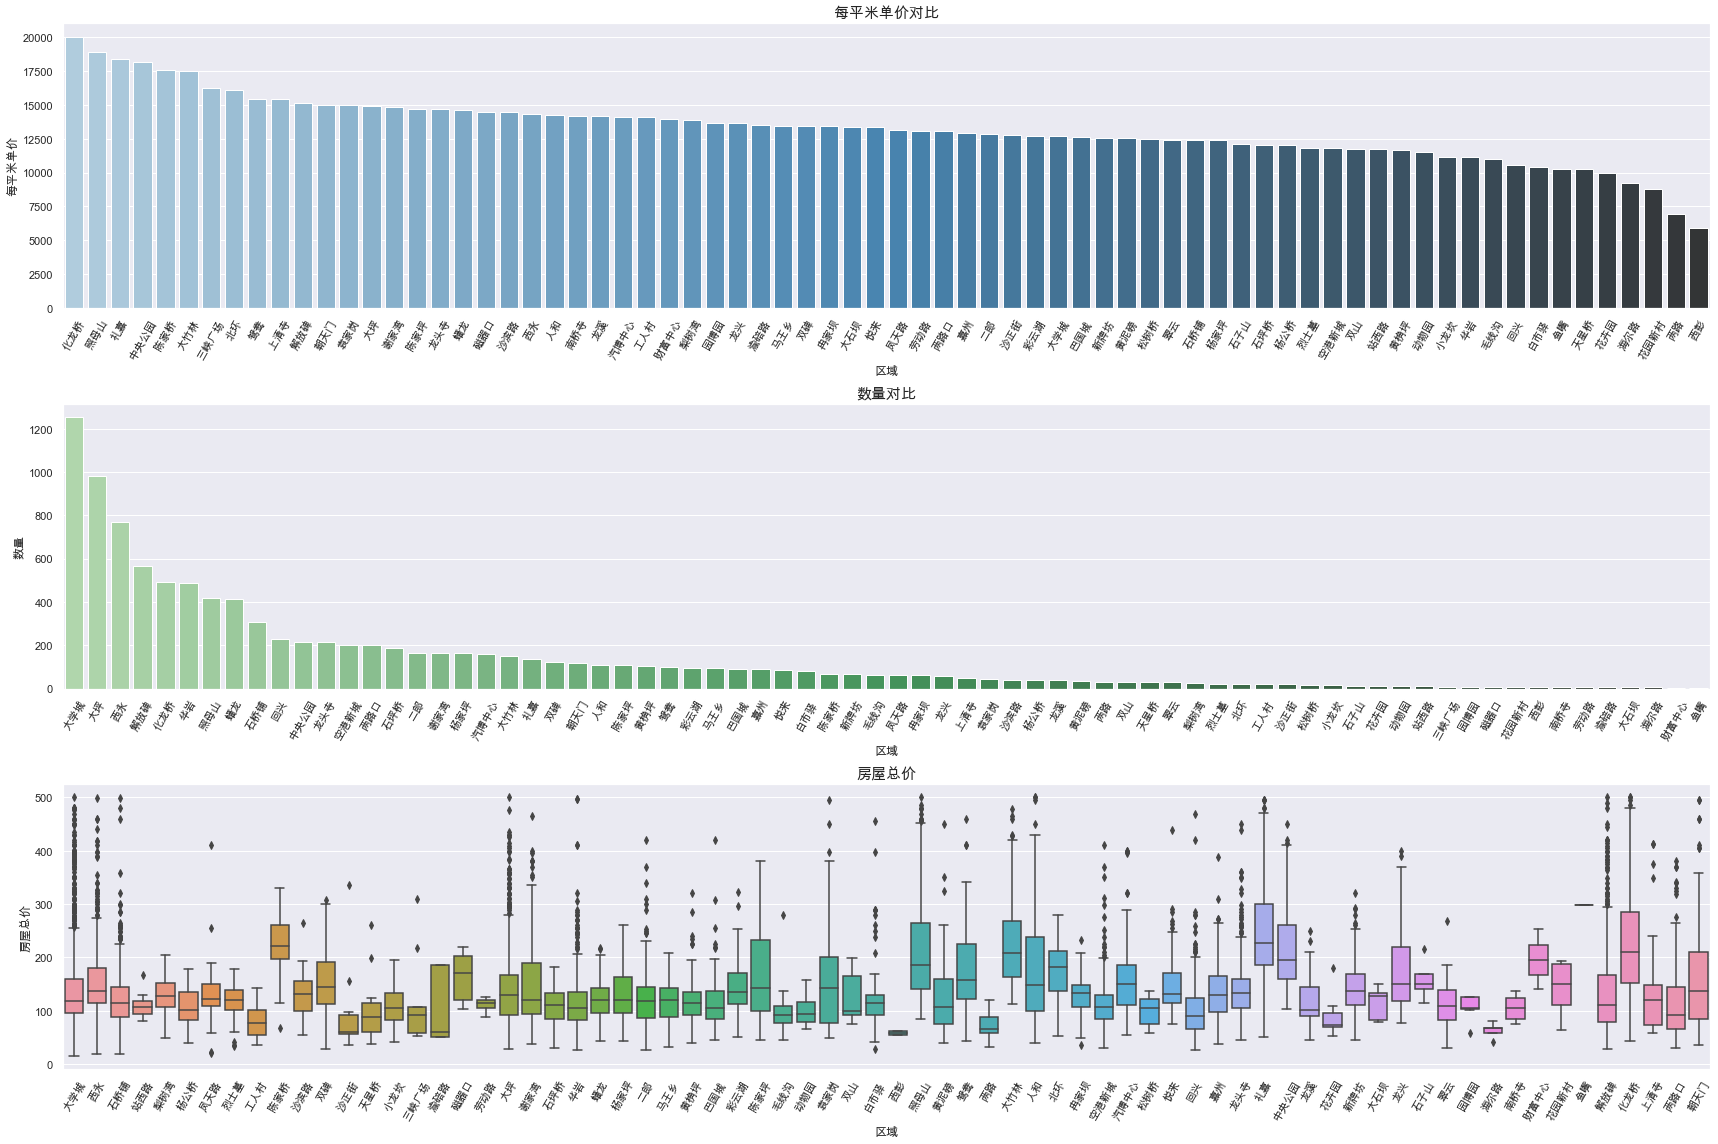

In [268]:
df_house_count = df.groupby('position')['total_price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('position')['unit_price'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(24,16))

sns.barplot(x='position', y='unit_price', palette="Blues_d", data=df_house_mean, ax=ax1)
# 设置坐标lable展示
ax1.set_xticklabels(df_house_mean.position,rotation=60)
ax1.set_title('每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='position', y='total_price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_xticklabels(df_house_count.position,rotation=60)
ax2.set_title('数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='position', y='total_price', data=df, ax=ax3)
ax3.set_title('房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')
plt.xticks(rotation=60)

f.tight_layout() # 子图布局
plt.show()

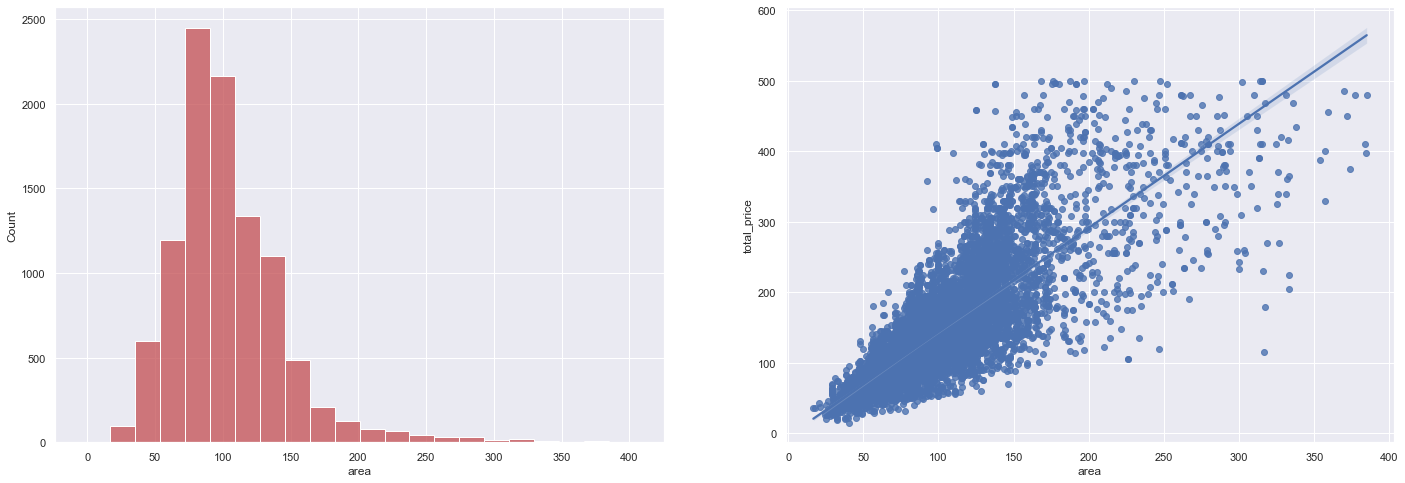

In [269]:
# 面积特征分析
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(24, 8))
# 建房面积的分布情况
sns.histplot(df['area'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['area'], fill=True, ax=ax1)
# 建房面积和出售价格的关系
sns.regplot(x='area', y='total_price', data=df, ax=ax2)

plt.show()

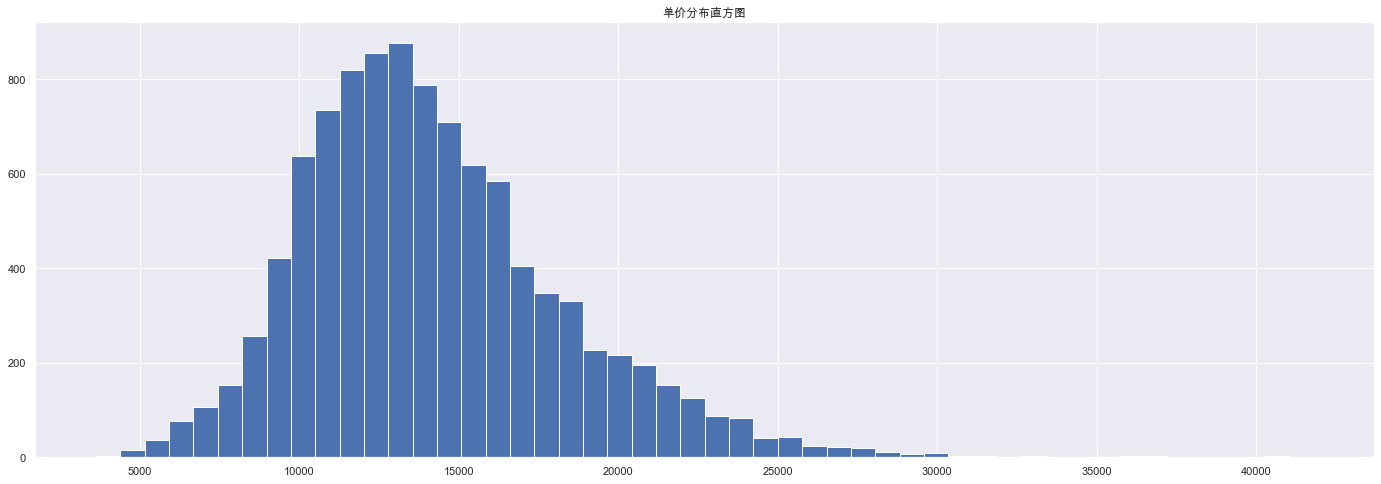

In [270]:
# 单价分布
plt.figure(figsize=(24,8))
df.unit_price.hist(bins = 50)
plt.title('单价分布直方图')
plt.show()

In [271]:
# 小区房源统计
community_df = df.groupby('community').total_price.count().reset_index().sort_values('total_price',ascending = False)
community_df.head(10)

,community,total_price
734,御林,159
1212,翡翠天麓,79
627,富力城天禧,78
145,书香溪墅,72
304,北大资源燕南,67
1570,雍江艺庭,67
785,恒大雅苑,64
595,奥园盘龙壹号,59
1338,财信渝中城,57
1568,雍江悦庭,57


In [272]:
# 小区单价排名
community_df=df.groupby('community').unit_price.mean().sort_values(ascending=False).head(10).reset_index()
community_df

,community,unit_price
0,重庆来福士广场,38493.00
1,巴蜀剑桥,32467.00
2,香港置地壹号半岛,29947.00
3,万科翡翠方舟,28458.00
4,鹏润鹿山台,28199.50
5,龙湖悠山香庭,28137.00
6,华宇御澜湾,26537.00
7,约克郡汀兰,25901.25
8,远洋城嶺墅,25373.00
9,巴蜀俊秀,25193.00


In [273]:
# 筛选合适房源
df = df[(df.total_price <= 90.0) & (df.area >= 60.0)]
df = df[df.layout.isin(["3室2厅", "3室1厅", "2室2厅", "2室1厅"])]
df.head()

,community,position,layout,area,towards,furnish,floor,year,build_type,unit_price,total_price
9,书香溪墅,大学城,3室1厅,91.48,南,毛坯,高楼层(共27层),2019年建,板楼,9074,83.0
18,锦绣天城,站西路,3室2厅,66.32,东,精装,35层,未知,塔楼,12214,81.0
19,天骄名城一期,大学城,2室1厅,70.50,东南,精装,中楼层(共18层),2013年建,板塔结合,10781,76.0
22,华宇林泉雅舍,杨公桥,2室1厅,76.18,东南,其他,中楼层(共29层),2006年建,塔楼,11290,86.0
33,书香溪墅,大学城,3室1厅,91.51,南,毛坯,中楼层(共27层),未知,板楼,8852,81.0
